In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
data.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
selected_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(selected_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
cluster_assignments = kmeans.predict(selected_features)
data['Cluster'] = cluster_assignments

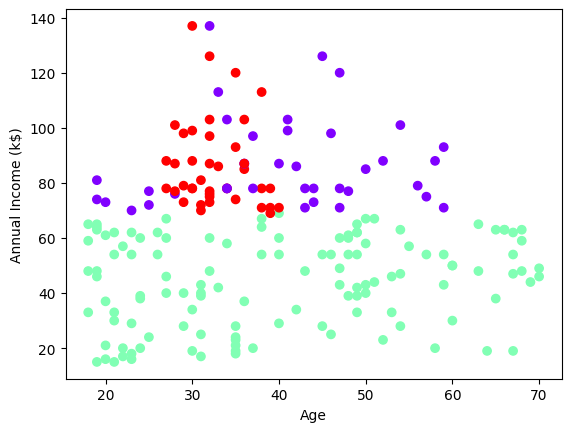

In [20]:
plt.scatter(selected_features.iloc[:, 0], selected_features.iloc[:, 1], c=cluster_assignments, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [23]:
def assign_to_cluster(age, income, spending_score):
    customer_data = [[age, income, spending_score]]
    cluster_assignment = kmeans.predict(customer_data)
    return f"Customer belongs to Cluster: {cluster_assignment[0]}"

In [24]:
input_age = 30
input_income = 60
input_spending_score = 50

cluster_name = assign_to_cluster(input_age, input_income, input_spending_score)
print(cluster_name)

Customer belongs to Cluster: 1


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
